In [6]:
exp(1.5 - 0.3 * 0.8 + 1.0 * 1.2 )

[1] 11.70481

In [3]:
install.packages('COUNT')
library("COUNT")

also installing the dependencies ‘zoo’, ‘msme’, ‘sandwich’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: msme
Loading required package: MASS
Loading required package: lattice
Loading required package: sandwich


In [4]:
data("badhealth")
?badhealth
head(badhealth)

numvisit,badh,age
<dbl>,<dbl>,<dbl>
30,0,58
20,0,54
16,0,44
20,0,57
15,0,33
15,0,28


In [5]:
library("rjags")

Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1127
   Unobserved stochastic nodes: 4
   Total graph size: 3665

Initializing model



Potential scale reduction factors:

       Point est. Upper C.I.
b_age        1.00       1.01
b_badh       1.01       1.02
b_intx       1.01       1.02
int          1.01       1.02

Multivariate psrf

1.01

,b_age,b_badh,b_intx,int
Lag 0,1.0000000,1.0000000,1.0000000,1.0000000
Lag 1,0.9606831,0.9666740,0.9691076,0.9572625
Lag 5,0.8419995,0.8731840,0.8798814,0.8411267
Lag 10,0.7160988,0.7728993,0.7838643,0.7151529
Lag 50,0.2391150,0.3451000,0.3580083,0.2392025


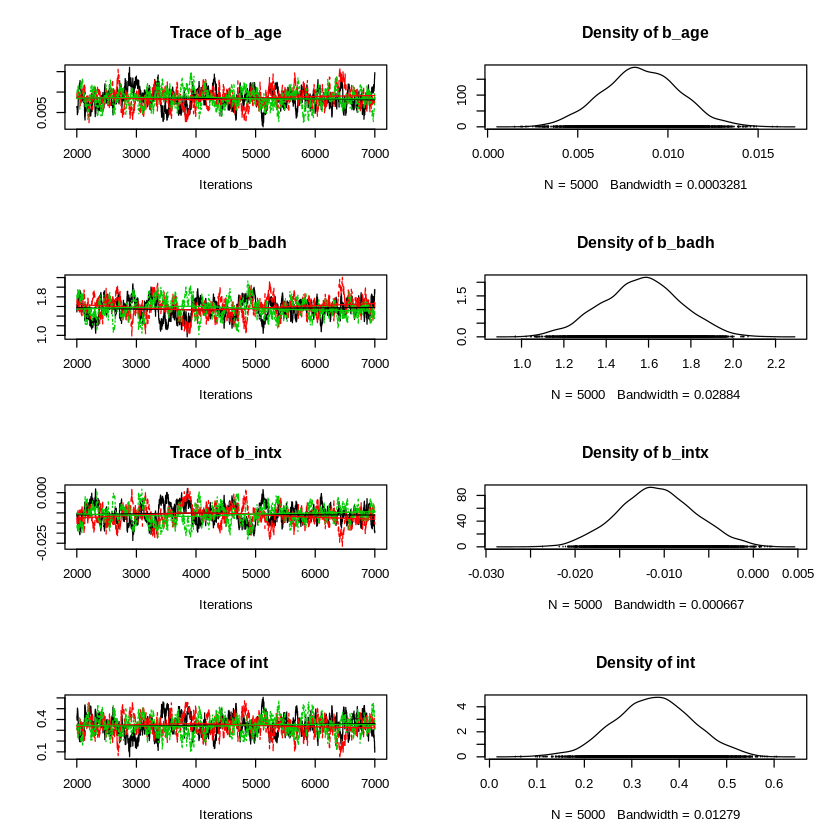

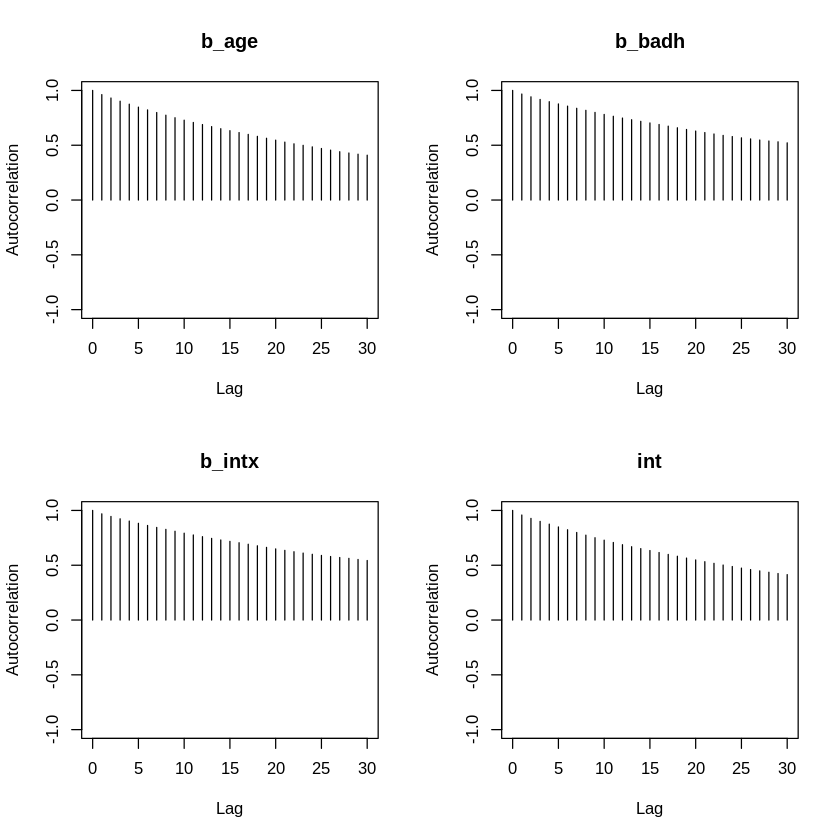

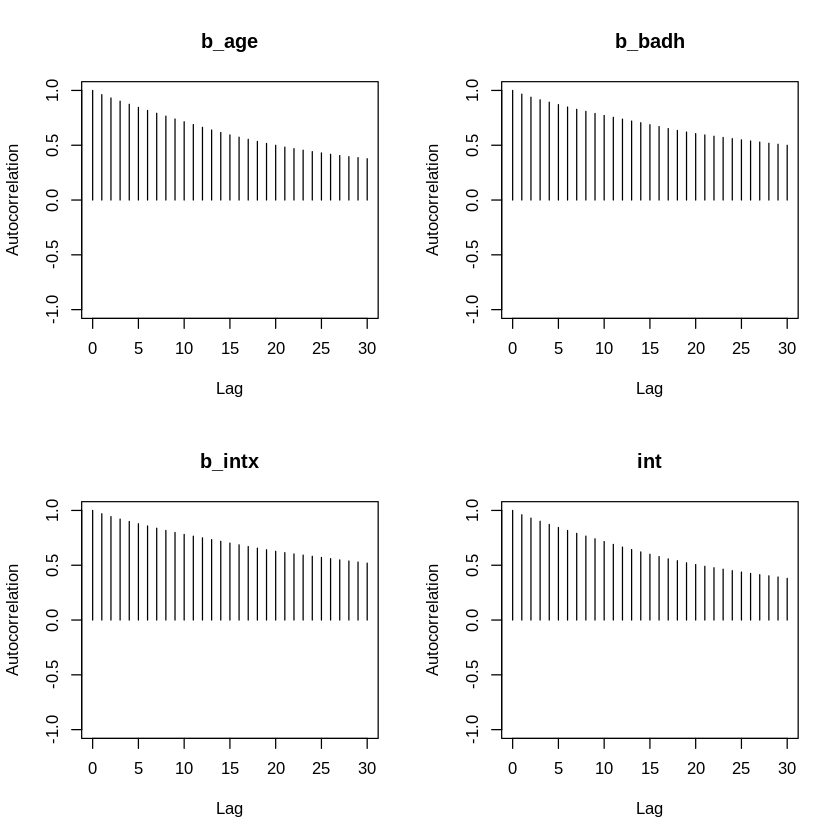

b_age   b_badh   b_intx      int 
252.0429 189.0971 183.6815 240.6389

Mean deviance:  5630 
penalty 4.263 
Penalized deviance: 5634 

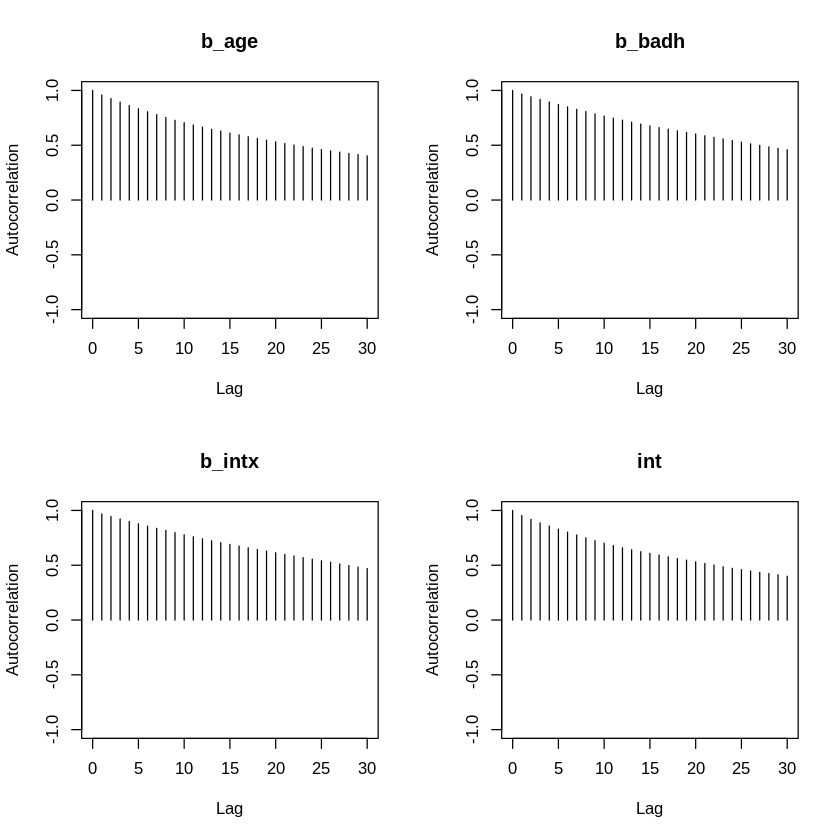

In [9]:
mod_string = " model {
    for (i in 1:length(numvisit)) {
        numvisit[i] ~ dpois(lam[i])
        log(lam[i]) = int + b_badh*badh[i] + b_age*age[i] + b_intx*age[i]*badh[i]
    }
    
    int ~ dnorm(0.0, 1.0/1e6)
    b_badh ~ dnorm(0.0, 1.0/1e4)
    b_age ~ dnorm(0.0, 1.0/1e4)
    b_intx ~ dnorm(0.0, 1.0/1e4)
} "

set.seed(102)

data_jags = as.list(badhealth)

params = c("int", "b_badh", "b_age", "b_intx")

mod = jags.model(textConnection(mod_string), data=data_jags, n.chains=3)
update(mod, 1e3)

mod_sim = coda.samples(model=mod,
                        variable.names=params,
                        n.iter=5e3)
mod_csim = as.mcmc(do.call(rbind, mod_sim))

## convergence diagnostics
plot(mod_sim)

gelman.diag(mod_sim)
autocorr.diag(mod_sim)
autocorr.plot(mod_sim)
effectiveSize(mod_sim)

## compute DIC
dic = dic.samples(mod, n.iter=1e3)
dic

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1127
   Unobserved stochastic nodes: 3
   Total graph size: 3587

Initializing model



Potential scale reduction factors:

       Point est. Upper C.I.
b_age        1.01       1.02
b_badh       1.00       1.00
int          1.01       1.02

Multivariate psrf

1

,b_age,b_badh,int
Lag 0,1.00000000,1.000000000,1.00000000
Lag 1,0.94523359,0.485048222,0.94047358
Lag 5,0.77405439,0.064999025,0.76359956
Lag 10,0.60180068,0.014652987,0.59984583
Lag 50,0.05550434,0.006476772,0.05125423


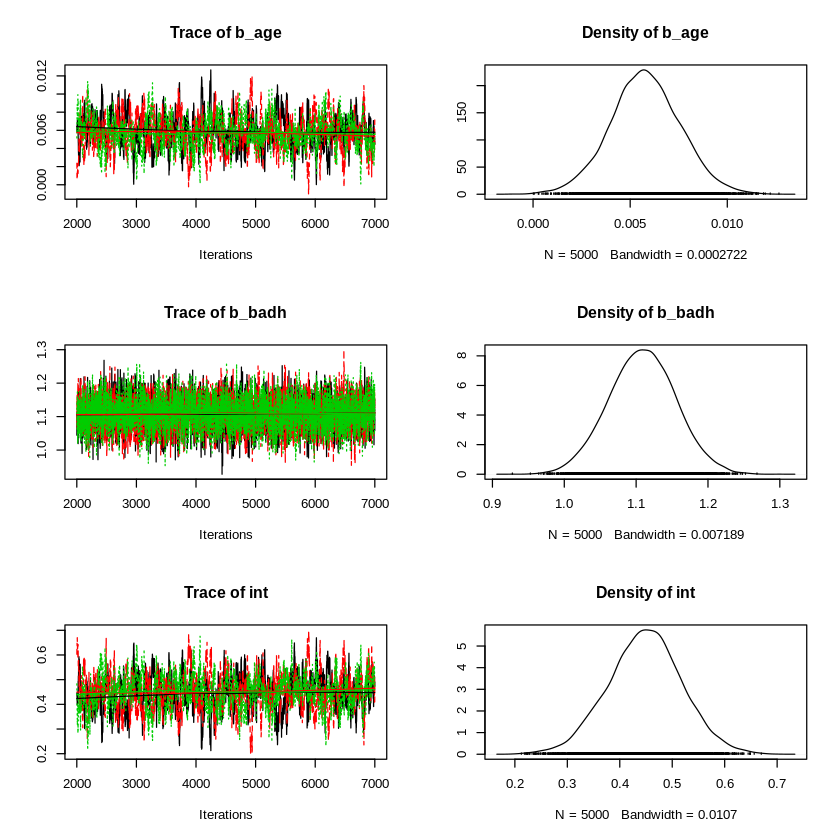

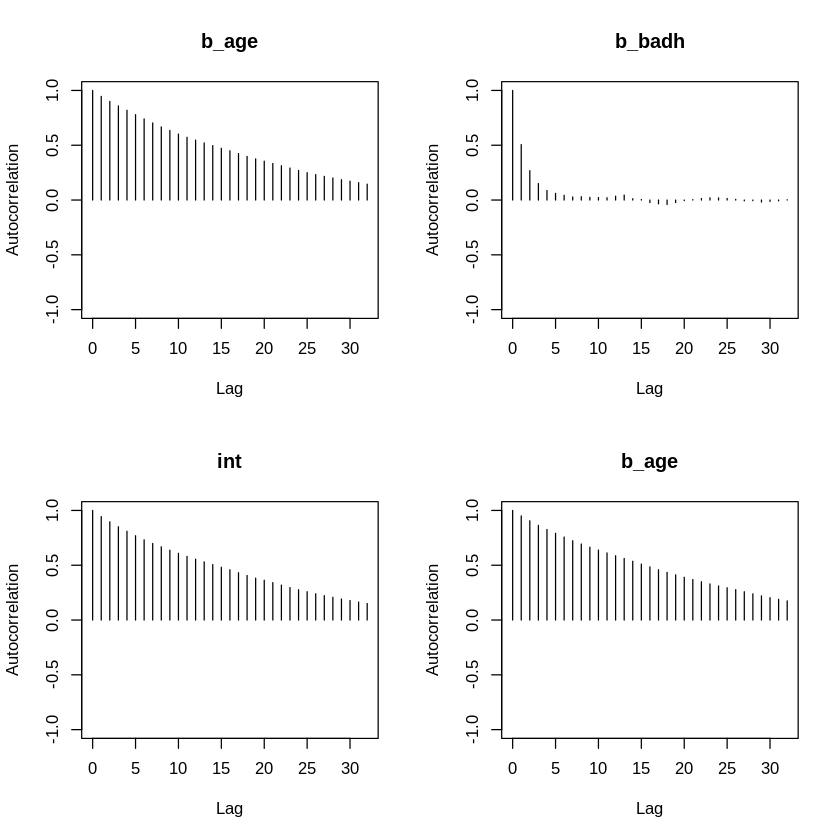

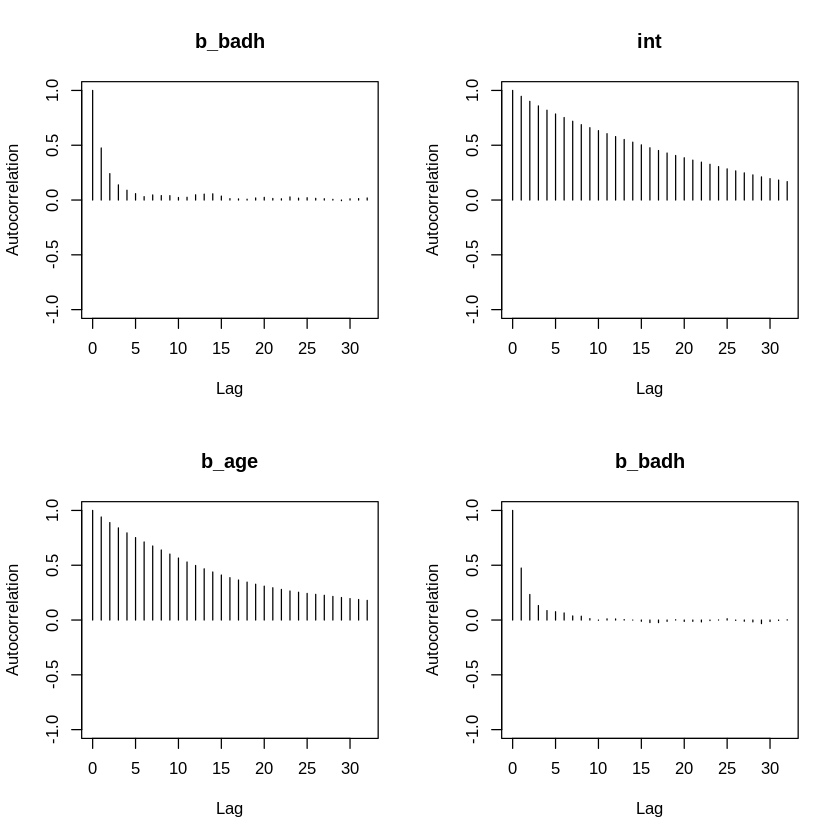

b_age    b_badh       int 
 387.4155 4622.9349  399.7032

Mean deviance:  5636 
penalty 3.085 
Penalized deviance: 5639 

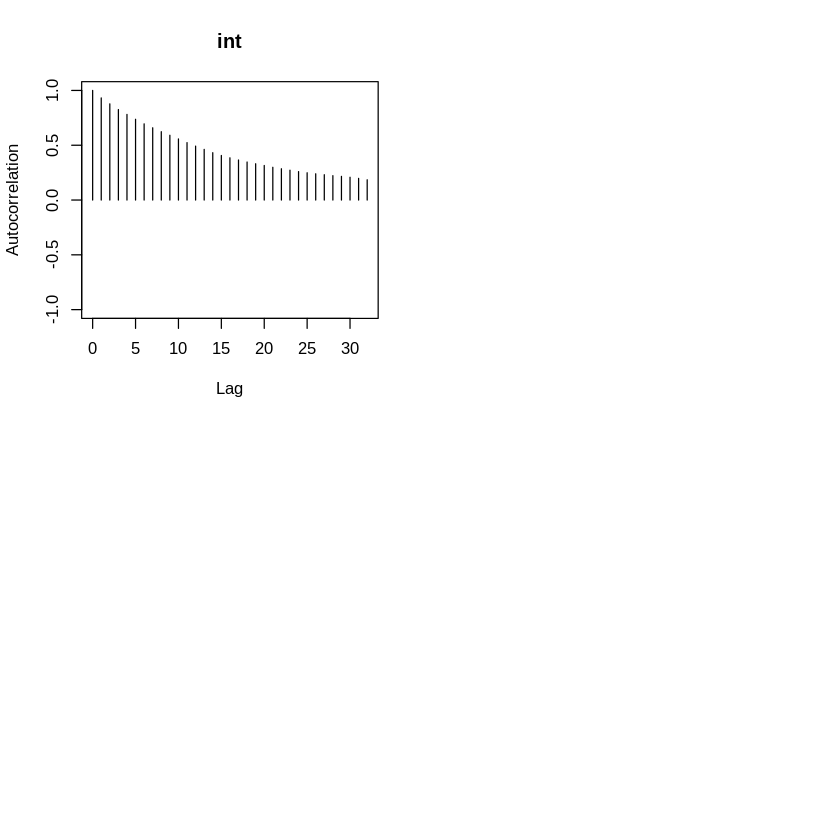

In [10]:
mod2_string = " model {
    for (i in 1:length(numvisit)) {
        numvisit[i] ~ dpois(lam[i])
        log(lam[i]) = int + b_badh*badh[i] + b_age*age[i]
    }
    
    int ~ dnorm(0.0, 1.0/1e6)
    b_badh ~ dnorm(0.0, 1.0/1e4)
    b_age ~ dnorm(0.0, 1.0/1e4)
} "

set.seed(102)

data_jags = as.list(badhealth)

params = c("int", "b_badh", "b_age")

mod2 = jags.model(textConnection(mod2_string), data=data_jags, n.chains=3)
update(mod2, 1e3)

mod2_sim = coda.samples(model=mod2,
                        variable.names=params,
                        n.iter=5e3)
mod2_csim = as.mcmc(do.call(rbind, mod2_sim))

## convergence diagnostics
plot(mod2_sim)

gelman.diag(mod2_sim)
autocorr.diag(mod2_sim)
autocorr.plot(mod2_sim)
effectiveSize(mod2_sim)

## compute DIC
dic = dic.samples(mod2, n.iter=1e3)
dic

In [49]:
ppois(21, 30)

[1] 0.0544434

In [47]:
?ppois

In [18]:
dat = read.csv(file="callers.csv", header=TRUE)
## set R's working directory to the same directory
## as this file, or use the full path to the file.

In [19]:
summary(dat)

     calls         days_active       isgroup2           age       
 Min.   :0.0000   Min.   :21.00   Min.   :0.0000   Min.   :19.00  
 1st Qu.:0.0000   1st Qu.:36.00   1st Qu.:0.0000   1st Qu.:26.00  
 Median :0.0000   Median :52.00   Median :0.0000   Median :30.00  
 Mean   :0.8393   Mean   :53.61   Mean   :0.1071   Mean   :30.11  
 3rd Qu.:1.0000   3rd Qu.:70.00   3rd Qu.:0.0000   3rd Qu.:33.00  
 Max.   :8.0000   Max.   :90.00   Max.   :1.0000   Max.   :43.00  

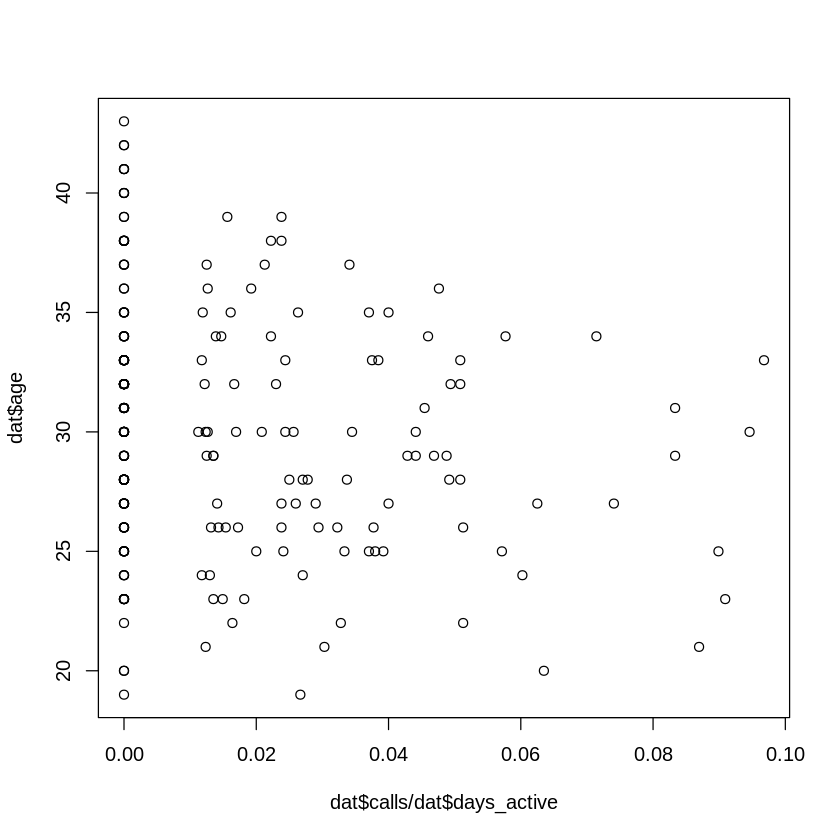

In [21]:
plot(dat$calls/dat$days_active, dat$age)

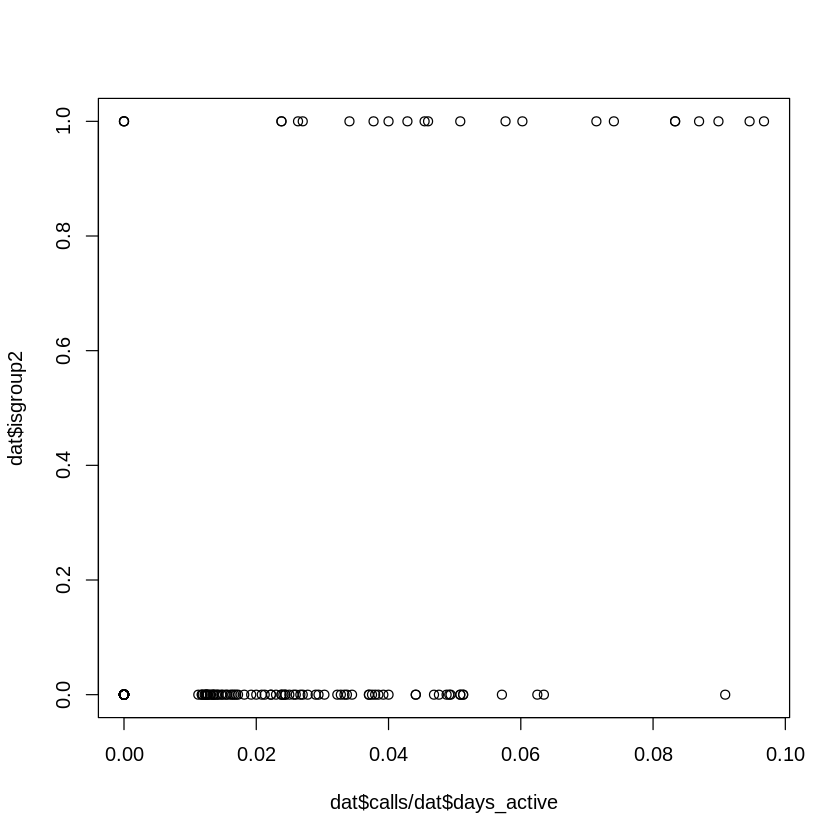

In [22]:
plot(dat$calls/dat$days_active, dat$isgroup2)

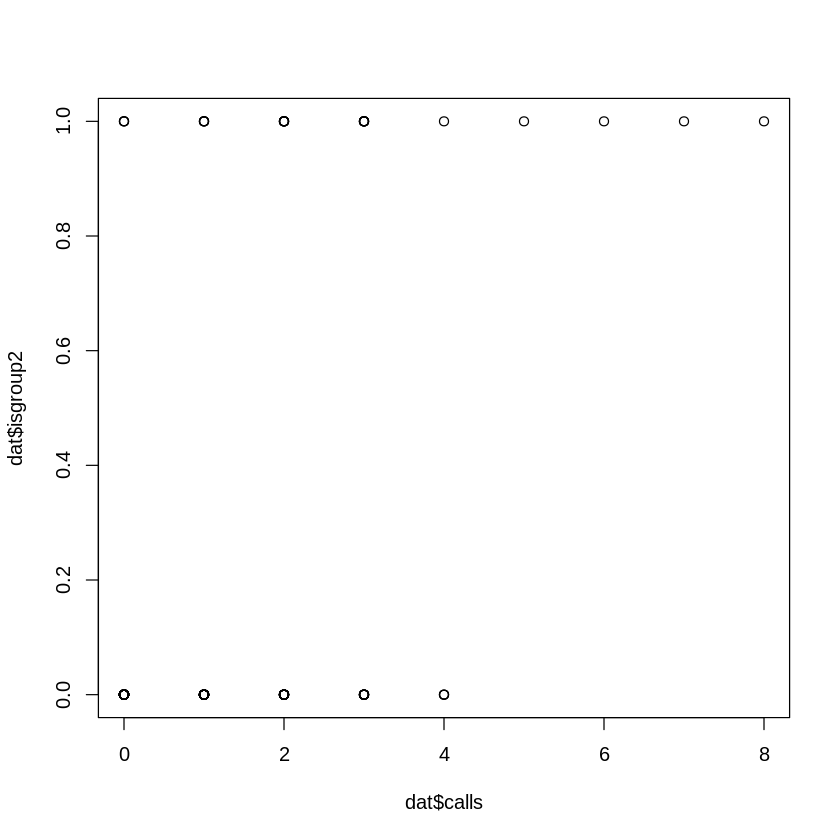

In [23]:
plot(dat$calls, dat$isgroup2)

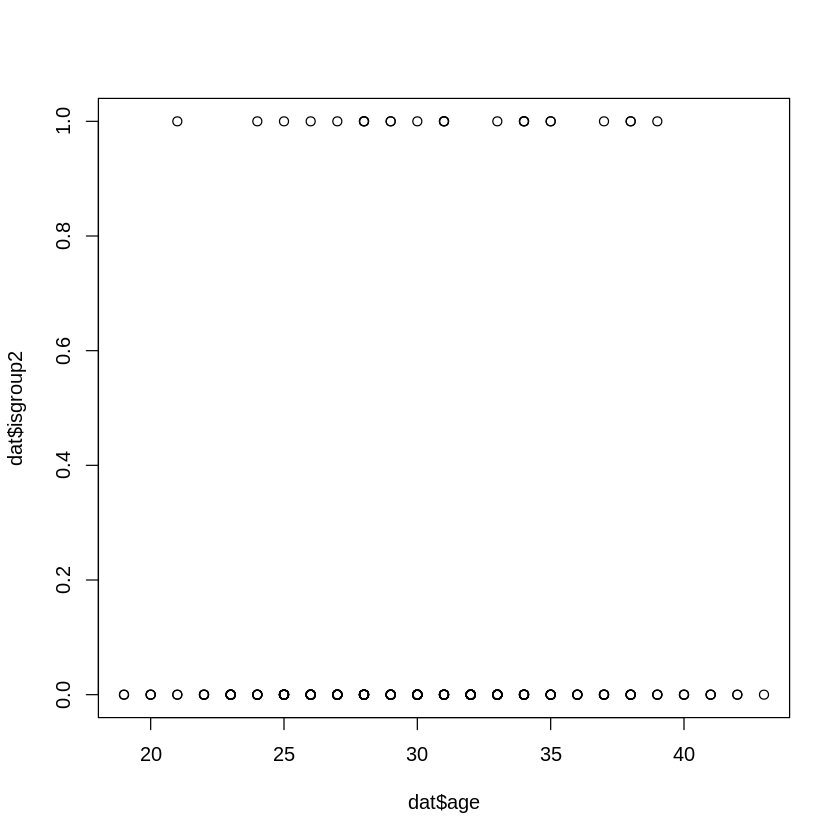

In [24]:
plot(dat$age, dat$isgroup2)

Warning message in jags.model(textConnection(mod_call_string), data = dat, n.chains = 3):
“Unused variable "days_active" in data”

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 224
   Unobserved stochastic nodes: 3
   Total graph size: 788

Initializing model



Potential scale reduction factors:

     Point est. Upper C.I.
b[1]          1       1.01
b[2]          1       1.00
b0            1       1.01

Multivariate psrf

1

,b[1],b[2],b0
Lag 0,1.0000000,1.00000000,1.0000000
Lag 1,0.9776195,0.50237043,0.9772202
Lag 5,0.9043581,0.04717227,0.9032145
Lag 10,0.8228259,0.01592880,0.8206755
Lag 50,0.3833242,-0.00859278,0.3760228


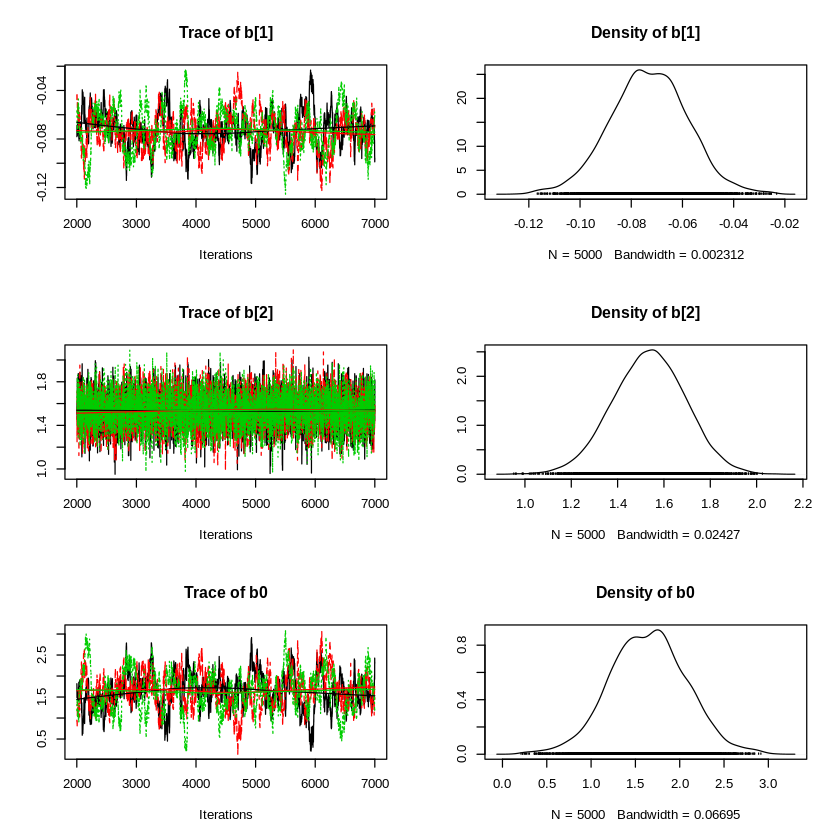

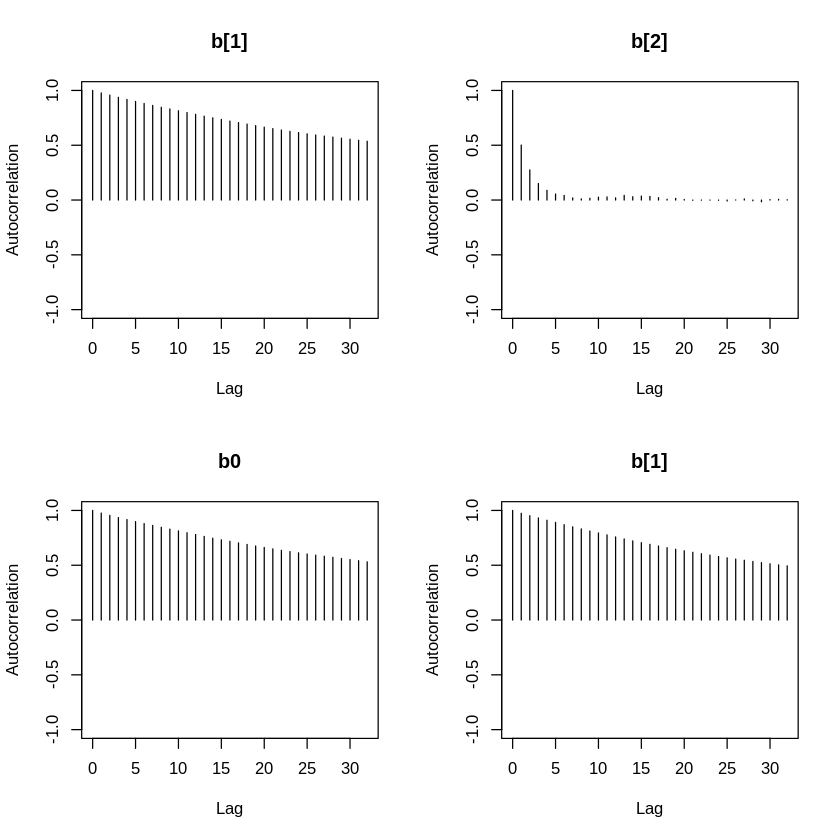

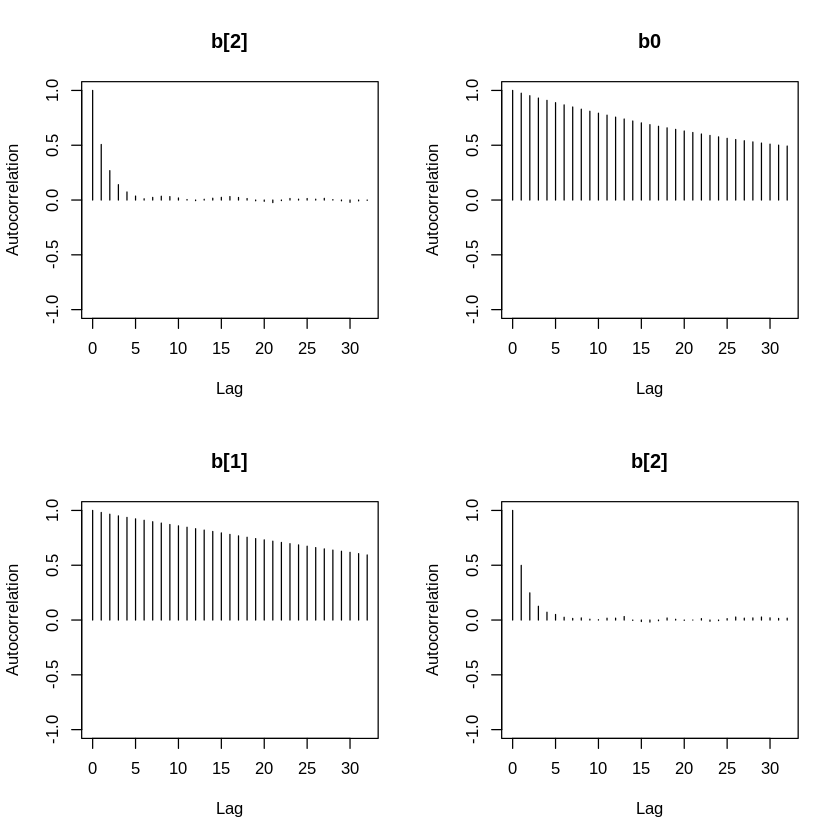

b[1]      b[2]        b0 
 143.6205 4868.9013  148.6778

Mean deviance:  525.8 
penalty 3.024 
Penalized deviance: 528.8 

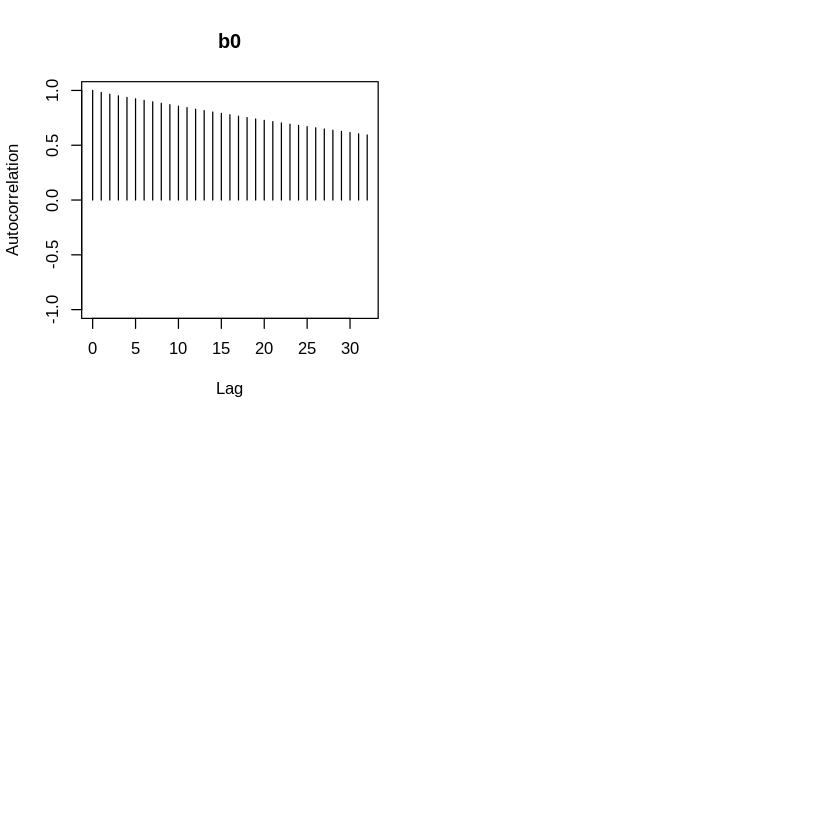

In [27]:
mod_call_string = " model {
    for (i in 1:length(calls)) {
        calls[i] ~ dpois(lam[i])
        log(lam[i]) = b0 + b[1]*age[i] + b[2]*isgroup2[i]
    }

    b0 ~ dnorm(0.0, 1.0/10.0^2)
    for (i in 1:2) {
        b[i] ~ dnorm(0.0, 1.0/10.0^2)
    }
} "

set.seed(102)

data_jags = as.list(badhealth)

params = c("b0", "b")

mod_call = jags.model(textConnection(mod_call_string), data=dat, n.chains=3)
update(mod_call, 1e3)

mod_call_sim = coda.samples(model=mod_call,
                           variable.names=params,
                           n.iter=5e3)
mod_call_csim = as.mcmc(do.call(rbind, mod_call_sim))

## convergence diagnostics
plot(mod_call_sim)

gelman.diag(mod_call_sim)
autocorr.diag(mod_call_sim)
autocorr.plot(mod_call_sim)
effectiveSize(mod_call_sim)

## compute DIC
dic = dic.samples(mod_call, n.iter=1e3)
dic

In [43]:
summary(mod_call_sim)


Iterations = 2001:7000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
b[1] -0.07311 0.01515 0.0001237       0.001305
b[2]  1.53590 0.15670 0.0012794       0.002246
b0    1.64322 0.43437 0.0035466       0.036595

2. Quantiles for each variable:

        2.5%      25%      50%      75%    97.5%
b[1] -0.1034 -0.08307 -0.07309 -0.06307 -0.04314
b[2]  1.2240  1.43076  1.53843  1.64260  1.83917
b0    0.7792  1.35014  1.64588  1.92927  2.49357


In [46]:
mean(as.matrix(mod_call_sim)[,2] > 0)

[1] 1